Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#load the file
df= pd.read_csv('Telco_Churn_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#basic checks:
df.shape

(7043, 21)

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df[~df.apply(np.isreal).all(1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Check the descriptive statistics of numeric variables : 5 number summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

50% of the customers have tenure less than 29 months and 75% of customers have tenure less than 55 months

avg charges applied to a customer are USD 64.76  whereas 25% customers are charged > USD 89.85 per month

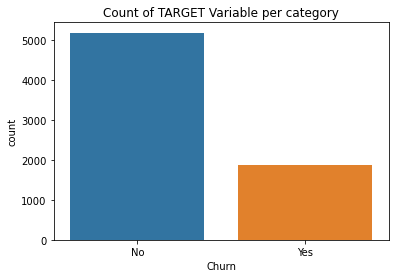

In [16]:
# Target Variable Distribution
sns.countplot(x='Churn', data = df)
plt.title('Count of TARGET Variable per category')
plt.show()

In [14]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [19]:
print('Count of target variable per category :\n', df.Churn.value_counts())
print('\n')
print('% of target variable per category :\n', df.Churn.value_counts()/ len(df))

Count of target variable per category :
 No     5174
Yes    1869
Name: Churn, dtype: int64


% of target variable per category :
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


Percentage of customers who churn are 27% and 73% customers dont churn

Data is highly imbalanced, ratio is 73:27

## DATA CLEANING

In [22]:
d1 = df.copy()
d1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
##if we look into csv/raw data it has blanks in TotalCharges column , if we look through the data we found out that there are 11such values but the tenure 
#for all such values =0, i.e. the customer was not attached to the company to churn in first place and so no charges applied to him
#so we will replace those values by 0
d1['TotalCharges'] =d1['TotalCharges'].replace(' ',0)
d1[d1['tenure']==0]

#telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce') --turns totalcharges to numeric and hence  becomes visible in isnull

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [26]:
d1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
#Senior Citizen is object dtype and totalcharges is float
d1.SeniorCitizen=d1.SeniorCitizen.astype('object')
d1.TotalCharges=d1.TotalCharges.astype('float64')
d1.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
#now tenure is given in months but its hard to read counting the number of months and finding out the no. of years so for better readability we will
#bin the tenure data/year of the total months in tenure
df.tenure.max()

72

In [32]:
#72 means 6 years
labels = ['{} - {}'.format(i,i+11) for i in range(1,72,12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [40]:
d1['tenure_group']= pd.cut(d1.tenure, range(1,80,12),right=False,labels=labels)
d1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [41]:
d1.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [48]:
# Remove columns not required for processing
d1.drop(['customerID','tenure'], axis=1,inplace=True)

In [49]:
d1.shape

(7043, 20)

## Data Exploration

In [50]:
d1.Churn = np.where(d1.Churn=='Yes', 1, 0)
d1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Univariate Analysis

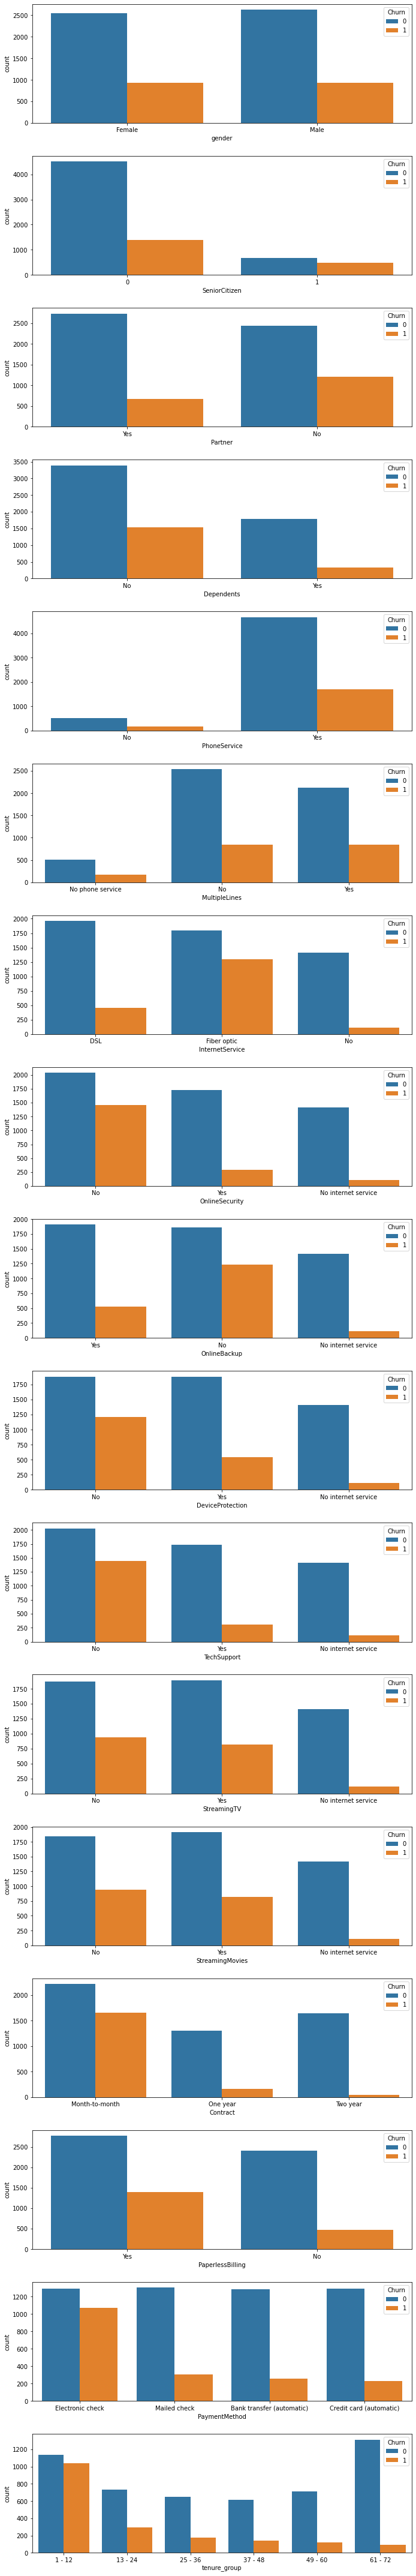

In [67]:
#Plot distibution of individual predictors by churn --CATEGORICAL PLOTTING
cols = [i for i in d1.columns if i not in ['Churn', 'TotalCharges', 'MonthlyCharges']]
fig, ax=plt.subplots(len(cols), figsize=(10,60))
for i, col in enumerate(cols):
    sns.countplot(data=d1,x=col, hue='Churn',ax=ax[i])
plt.tight_layout(pad=2)
plt.show()

gender has no effect on churn

people who are not senior citien are likely to churn more

people with no partners/single are most likely to churn

people with no Dependents/family behind  are most likely to churn

some people have no phone service, people with single and multipleline phone services are more likely to churn

people with FibreOptic Internet Service are more likely to churn then those with DSL services

people with NO- OnlineSecurity, DeviceProtection, OnlineBackup, etc i.e. phone /Internet Service are more likely to churn

some ppl have no Internet services

ppl with shorter period contracts are more likely to churn than one with longer periods- due to contract policies

ppl having paperless billing option are more likely to churn

ppl with payment method = 'Electronic Check' churn more

ppl associated for shorter durations/tenure(<=1yr) churn more than those who stayed longer


# Bivariate Analysis

<AxesSubplot:xlabel='tenure_group', ylabel='MonthlyCharges'>

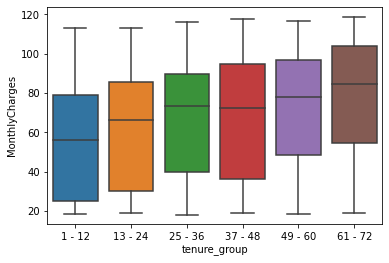

In [110]:
sns.boxplot(x='tenure_group', y='MonthlyCharges', data=d1)

In [71]:
a = d1.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
a['%_customers']= a['Churn']*100/ len(d1) #(or /a.Churn.sum())
print(a.Churn.sum(), len(df))
a = a.rename({'Churn': 'Churn_count'}, axis=1)
a=a.reset_index()
a

7043 7043


,SeniorCitizen,Churn,Churn_count,%_customers
0,0,0,4508,64.006815
1,0,1,1393,19.778503
2,1,0,666,9.456198
3,1,1,476,6.758484


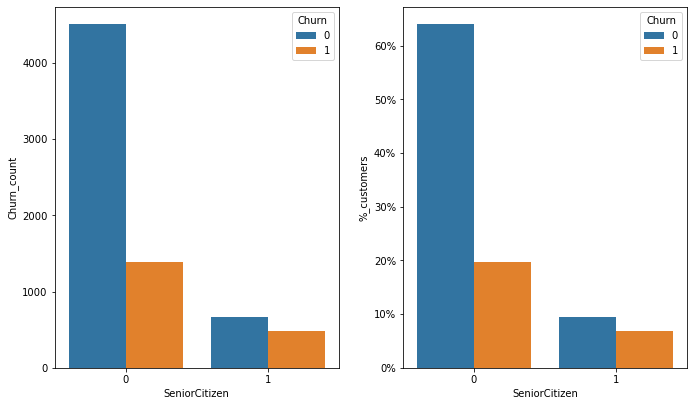

In [72]:
fig, ((ax1, ax2))= plt.subplots(1,2, figsize=(10,6))
ax = sns.barplot(x='SeniorCitizen', y='Churn_count', data=a, hue='Churn', ax=ax1)
ax = sns.barplot(x='SeniorCitizen', y='%_customers', data=a, hue='Churn', ax=ax2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #prints y axis along with % sign
plt.tight_layout(pad=2)

Senior Citizen is only 16% of the customers but we can see it has higher churn rate :42% against 23% for non-senior customers.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

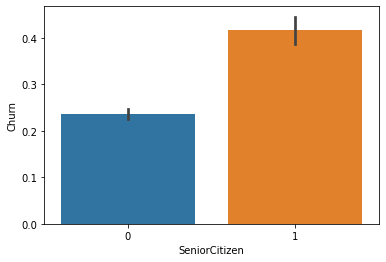

In [73]:
sns.barplot(x='SeniorCitizen', y='Churn', data=d1)

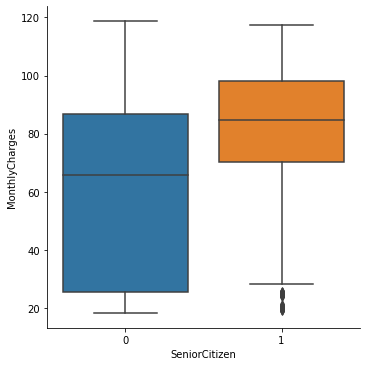

In [84]:
sns.catplot(x='SeniorCitizen', y='MonthlyCharges', data = d1, kind='box')

50% of the ppl who are senior citizen pay more monthly charges than almost 75% of the ppl who are not seniorcitizen

In [79]:
print(d1.groupby('Partner')['Churn'].mean(),'\n')
print(d1.groupby('Dependents')['Churn'].mean())

Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64 

Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64


<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

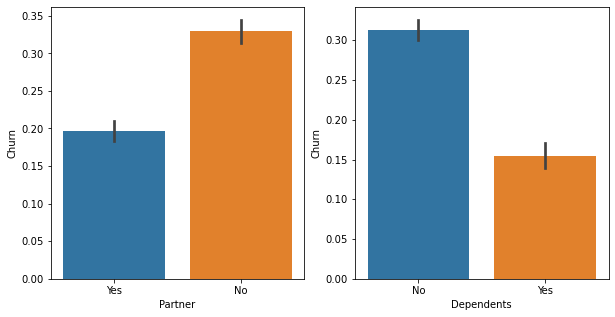

In [80]:
fig, ((ax1,ax2))= plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='Partner', y='Churn', data=d1,  ax=ax1) #churn rate for partner and depandencies
sns.barplot(x='Dependents', y='Churn', data=d1,  ax=ax2) 

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

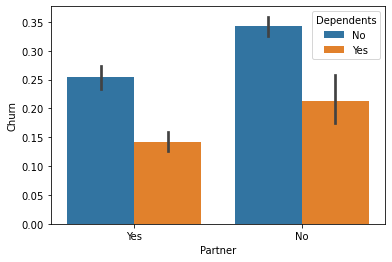

In [82]:
sns.barplot(x='Partner',y='Churn', data=d1, hue='Dependents' )

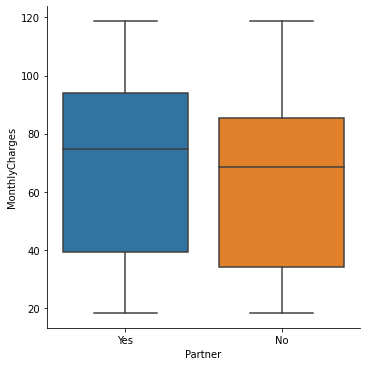

In [87]:
sns.catplot(x='Partner', y='MonthlyCharges', data = d1, kind='box')

In [83]:
d1.groupby('MultipleLines')['Churn'].mean()
#people with multiple lines phone service have higher churn rate (28%) than those with singleline / no service at all

MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

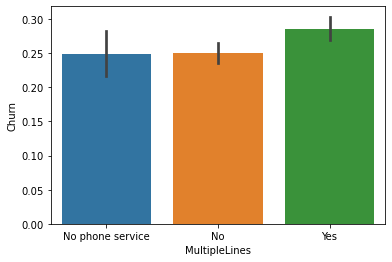

In [88]:
sns.barplot(x='MultipleLines', y='Churn', data=d1)

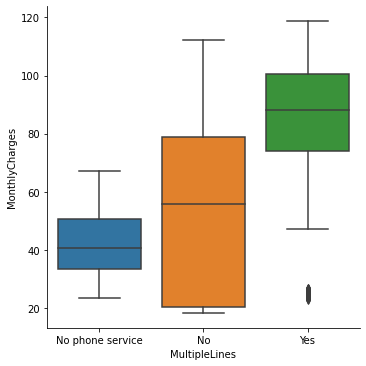

In [89]:
sns.catplot(x='MultipleLines', y='MonthlyCharges', data = d1, kind='box')

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

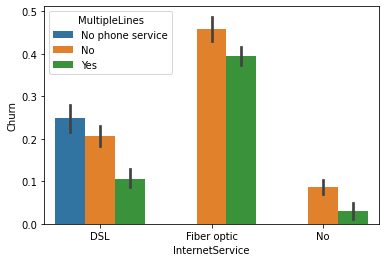

In [90]:
sns.barplot(x='InternetService', y='Churn', hue='MultipleLines',data=d1)

#Clients without internet have a very low churn rate
#Customers with fiber and No multiple lines are more probable to churn than those with DSL connection

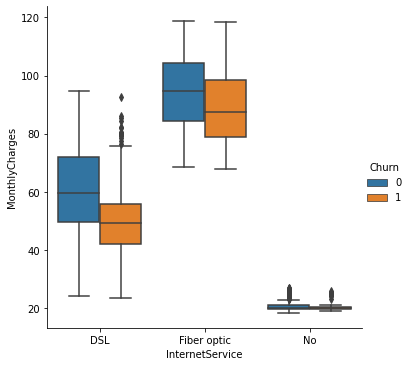

In [91]:
#Comparing the Internet service with monthly charges:
sns.catplot(x='InternetService', y ='MonthlyCharges', data =d1, hue='Churn', kind='box')

#It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn.

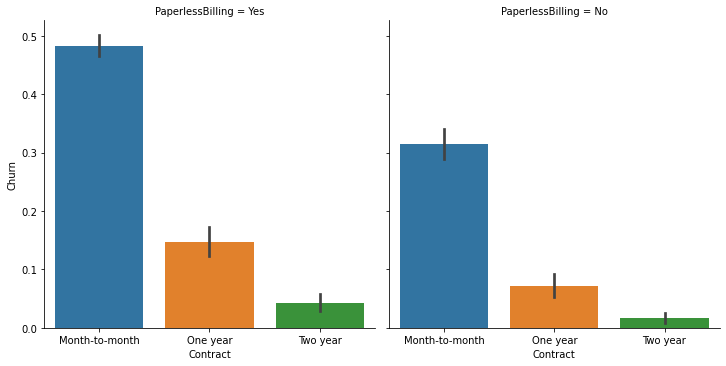

In [92]:
sns.catplot(x='Contract', y='Churn', col='PaperlessBilling', kind='bar', data=d1)

#Customers with paperless billing are more probable to churn
#preffered payment method is electronic check with around 34% of customers..This method also has a very high churn rate
#Short term contracts have higher churn rates
#One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. 
#if u churn prrior to contracts ends we ned to back back to the company a  fine

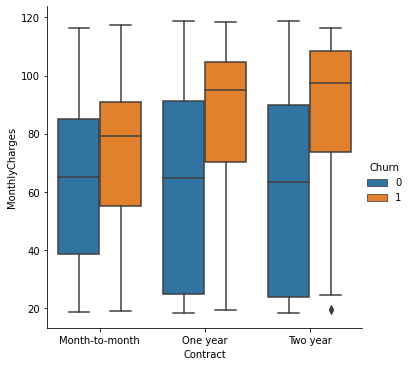

In [93]:
#wrt numerical column
sns.catplot(x='Contract', y ='MonthlyCharges', hue='Churn', data = d1, kind='box')

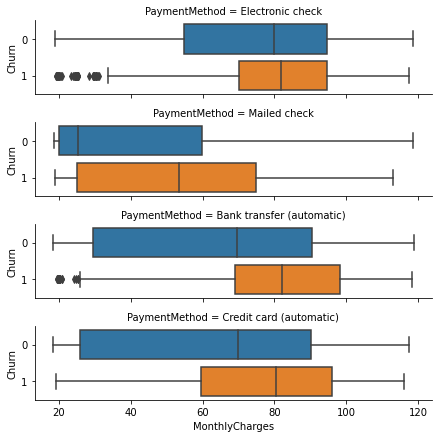

In [94]:
sns.catplot(y='Churn', x ='MonthlyCharges',  data = d1, kind='box', row='PaymentMethod', orient='h', height= 1.5, aspect=4)

#longer contracts are affected by higher  monthly charges..ie increaseing monthly charges for churn rate
#mailed checks have lower charges as compared to others
#there is a huge gap in monthly charges for ppl who churn and dont churn for mailed check 
#there is a huge gap inmonthly charges in the lower 25% and 50% ppl who churn and dont churn for banktransfer and cc

## CATEGORICAL ENCODING

In [98]:
temp=pd.get_dummies(d1)
temp.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [99]:
temp.shape

(7043, 52)

## Numerical Columns

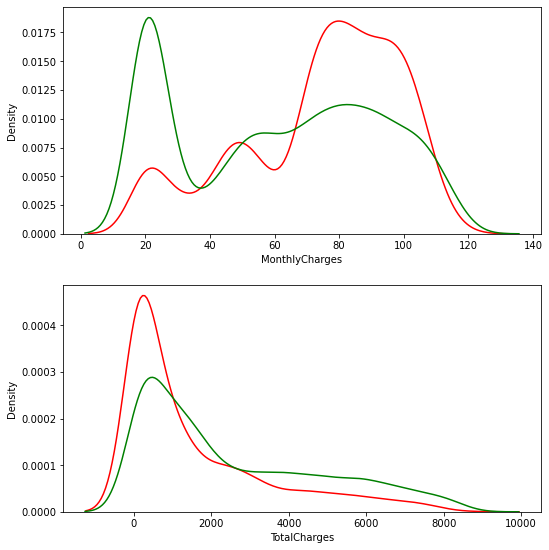

In [104]:
#Univariate
#distn of each variable w.r.t. target variable
cols =['MonthlyCharges', 'TotalCharges']
fig, ax=plt.subplots(len(cols), figsize=(8,8))
for i, col in enumerate(cols):
    sns.kdeplot(d1[d1['Churn']==1][col], color= 'r', ax=ax[i], label='churn')
    sns.kdeplot(d1[d1['Churn']==0][col], color= 'g', ax=ax[i], label='no churn')
plt.tight_layout(pad=2)
plt.show()

ppl with high MonthlyCharges churn more

Surprising insight as higher Churn at lower Total Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

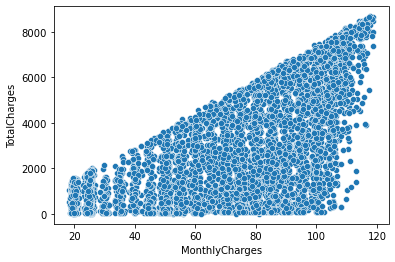

In [108]:
#Bivariate
##Relationship between Monthly Charges and Total Charges
sns.scatterplot(data=temp, x='MonthlyCharges', y='TotalCharges')

Total Charges increase as Monthly Charges increase - as expected.

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

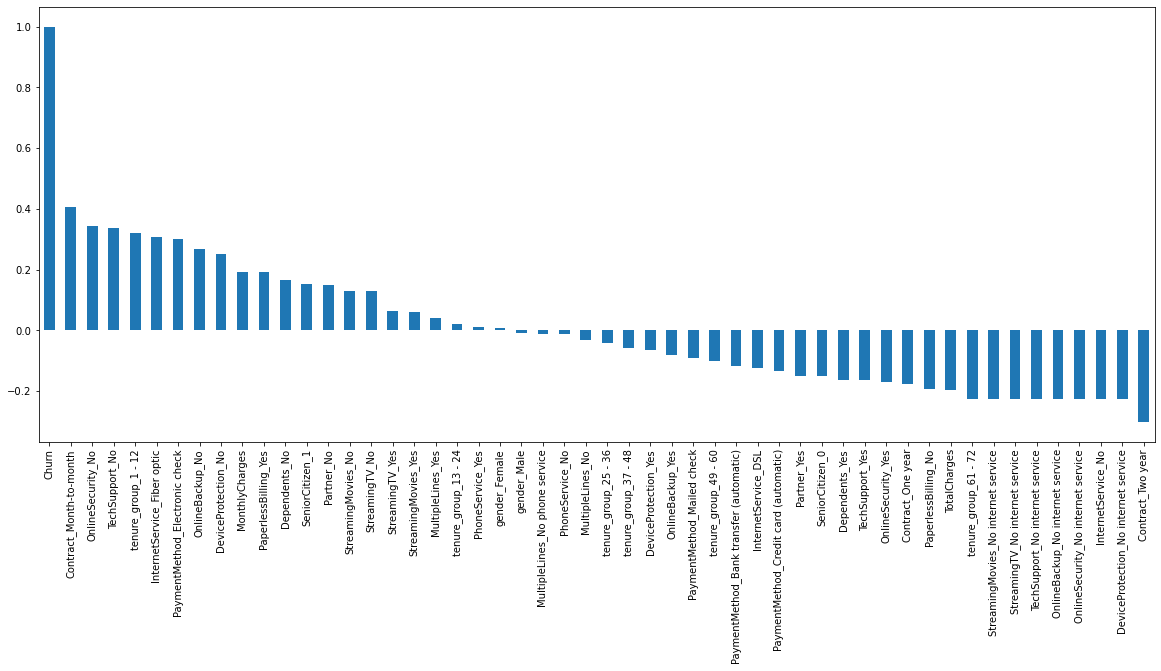

In [114]:
plt.figure(figsize=(20,8))
temp.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<AxesSubplot:>

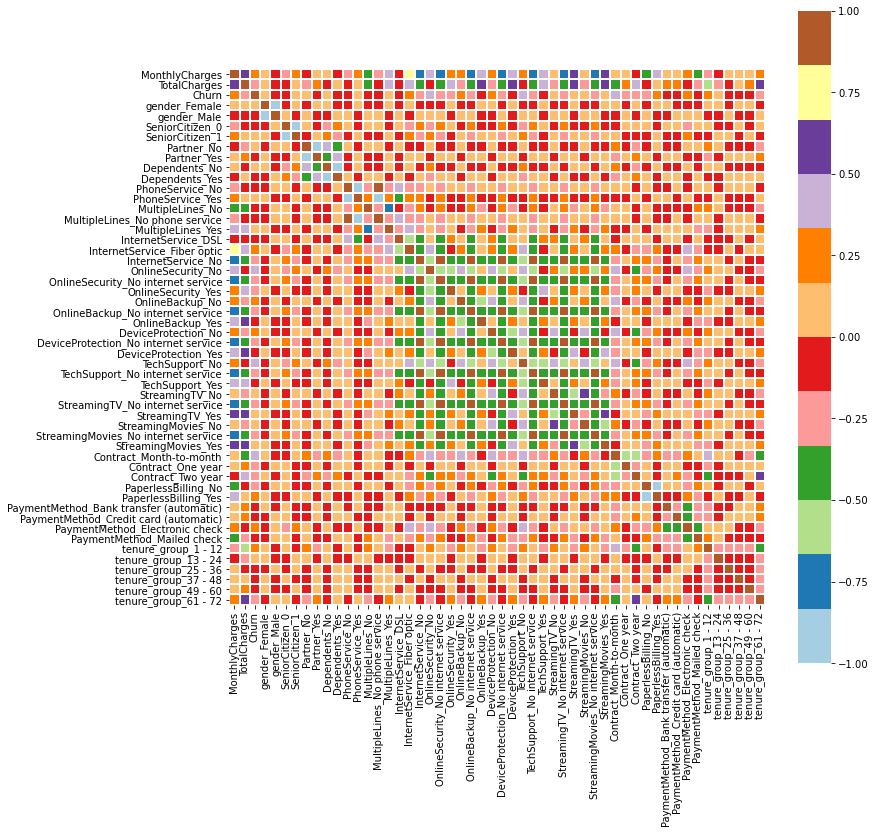

In [116]:
plt.figure(figsize=(12,12))
sns.heatmap(temp.corr(), cmap='Paired', linewidth=.1,square=True)